# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [37]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.manifold import TSNE

Load the data and remove the unnecessary columns.

In [38]:
data = pd.read_excel('alldata.xlsx')
data = data.drop(columns='alder')
data = data.drop(columns='storkreds')
print(data.columns)

Index(['530', '531', '533', '534', '535', '537', '538', '540', '541', '543',
       '544', '545', '546', '547', '548', '550', '551', '552', '553', '555',
       '556', '557', '559', '561', '563', 'navn', 'parti', '1a', '1b', '2a',
       '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a',
       '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b'],
      dtype='object')


Move the candidate's name and party to the end of the dataframe for easier selection of question data.

In [39]:
parti_col = data['parti']
navn_col = data['navn']
# Drop the columns 'parti' and 'navn'
data.drop(columns=['parti', 'navn'], inplace=True)

# Append the columns 'parti' and 'navn' to the end of the DataFrame
data['parti'] = parti_col
data['navn'] = navn_col
print(data.head())

   530  531  533  534  535  537  538  540  541  543  544  545  546  547  548  \
0   -1   -2    1   -2    2    1   -2    1    1    2   -2    1    2    2    1   
1    2    2   -1   -2   -1   -2    1   -2    2   -2    2   -1   -2   -2    2   
2    2    1   -2   -2    1   -2    1   -1    1   -1    2   -2   -2   -1    1   
3    2    1   -2   -1    1    1    1    1    1   -2    2    1    1   -2    2   
4    1    1   -2    2   -2    1   -2    1    2   -2   -2    2    2   -2    2   

   550  551  552  553  555  556  557  559  561  563  1a  1b  2a  2b  3a  3b  \
0   -2    1    2   -2    2    2    1    2    2   -2   0   0   2   2   2  -2   
1    2   -2    1    1   -1   -2    1    2    1    2   1   1   1   1   1   2   
2    1   -2    2   -1   -2   -1    1    2    2    2   1   1   1   2   1   1   
3    2   -2    2    1    2   -2    2    2    2    2   2   2   2   2   0   2   
4    1   -2    2   -2   -2   -1    1   -2   -1   -2  -2  -2   0   0  -2  -2   

   4a  4b  5a  5b  6a  6b  7a  7b  8a  8b  9

Extract only the question data into a separate dataframe and print.

In [40]:
pd.set_option('display.max_columns', None)  # This line will ensure all columns are displayed
index_of_parti = data.columns.get_loc('parti')
print(index_of_parti)
questions_data = data.iloc[:,:49]
print(questions_data.head())


49
   530  531  533  534  535  537  538  540  541  543  544  545  546  547  548  \
0   -1   -2    1   -2    2    1   -2    1    1    2   -2    1    2    2    1   
1    2    2   -1   -2   -1   -2    1   -2    2   -2    2   -1   -2   -2    2   
2    2    1   -2   -2    1   -2    1   -1    1   -1    2   -2   -2   -1    1   
3    2    1   -2   -1    1    1    1    1    1   -2    2    1    1   -2    2   
4    1    1   -2    2   -2    1   -2    1    2   -2   -2    2    2   -2    2   

   550  551  552  553  555  556  557  559  561  563  1a  1b  2a  2b  3a  3b  \
0   -2    1    2   -2    2    2    1    2    2   -2   0   0   2   2   2  -2   
1    2   -2    1    1   -1   -2    1    2    1    2   1   1   1   1   1   2   
2    1   -2    2   -1   -2   -1    1    2    2    2   1   1   1   2   1   1   
3    2   -2    2    1    2   -2    2    2    2    2   2   2   2   2   0   2   
4    1   -2    2   -2   -2   -1    1   -2   -1   -2  -2  -2   0   0  -2  -2   

   4a  4b  5a  5b  6a  6b  7a  7b  8a  8b

Scale the data using the standard scaler (mean of 0 with variance of 1) and apply PCA without specifying the number of components in order to see the variance explained by each component. 
We can observe that the first two components explain about 51% of the variance.

In [41]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(questions_data)

pca = PCA(n_components=None)
principal_components = pca.fit_transform(data_scaled)
print(pca.explained_variance_ratio_)

[0.41737636 0.10259865 0.04976015 0.04300927 0.0293233  0.0237033
 0.01994712 0.01697463 0.01676652 0.01608279 0.01527152 0.01449084
 0.01303718 0.01297392 0.01200226 0.01125725 0.0102922  0.00997773
 0.00986747 0.00966786 0.00928391 0.0089641  0.00877818 0.00786085
 0.00755989 0.00722701 0.00682415 0.00670982 0.00626662 0.00605007
 0.00582534 0.0055948  0.0052595  0.00505699 0.00473416 0.00466639
 0.00453667 0.00416406 0.00398844 0.00388108 0.00341904 0.00330379
 0.0029882  0.00290354 0.00251036 0.00244041 0.00210387 0.00141116
 0.00130729]


Specify the number of components, show the shape of the data, and plot the elbow graph.

[0.41737636 0.10259865 0.04976012 0.04300921 0.02932097 0.02370226
 0.01991486 0.01692977 0.0166561  0.01604087]
Original shape: (867, 49)
Reduced shape: (867, 10)


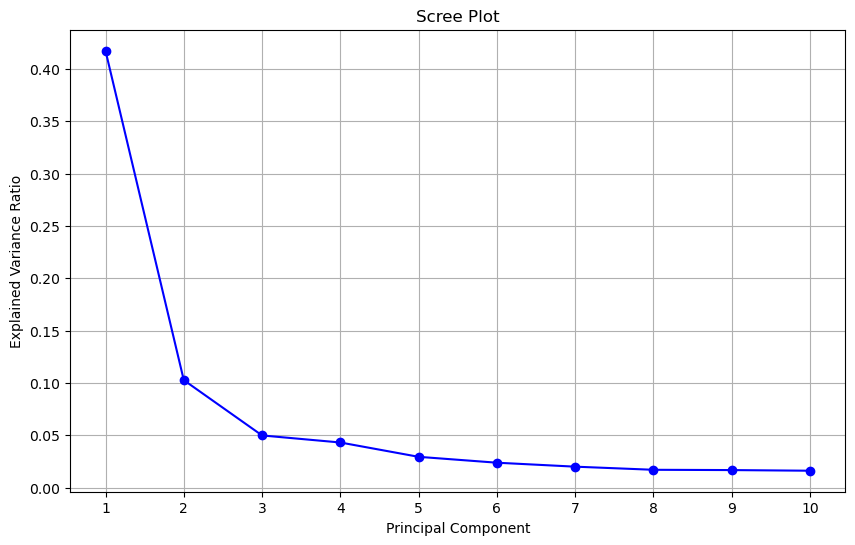

In [42]:
pca = PCA(n_components=10)
principal_components = pca.fit_transform(data_scaled)
print(pca.explained_variance_ratio_)

print("Original shape: {}".format(str(data_scaled.shape)))
print("Reduced shape: {}".format(str(principal_components.shape)))

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1 + len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 11))  # Ensuring that all components are marked on the x-axis
plt.grid(True)
plt.show()

Based on the information in the elbow graph, we pick two principal components for the analysis and plot a heatmap. The heatmap shows the 'loading' of the features in the selected components - essentially the weight of each question, or how much they are represented in the components. The more yellow the square representing the question is, the more it is represented in the component.

[0.41737636 0.10259865]
Original shape: (867, 49)
Reduced shape: (867, 2)


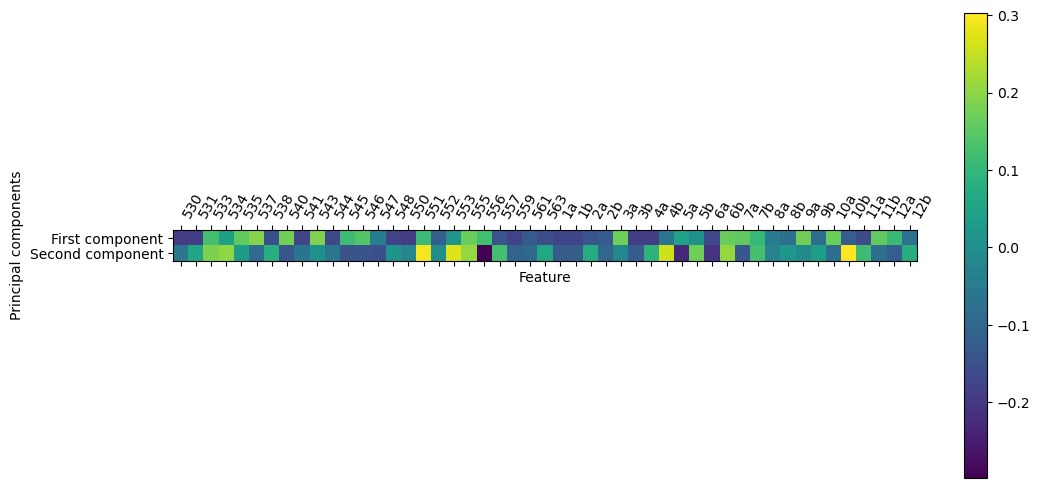

In [43]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
print(pca.explained_variance_ratio_)

print("Original shape: {}".format(str(data_scaled.shape)))
print("Reduced shape: {}".format(str(principal_components.shape)))

# Create a heatmap of the loading vectors
plt.figure(figsize=(12, 6))
plt.matshow(pca.components_, cmap='viridis', fignum=1)
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(questions_data.columns)),
           questions_data.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

The output of the code below shows 10 most influential questions for each component rounded to 5 decimal points and accompanied by the question ID, text and translation to english. The political compass by definition rates political ideology in a spectrum with two axes: 
- economic policy (left-rigth) - Component 1 
- social policy (authoritarian - libertarian) - Component 2

To some extent, this can be observed in the selected questions as well - the Component 1 seems to focus more on economic policy and governance. The most influential questions are 537, 543 and 540, which cover economic inequality and social welfare. On the other hand, the Component 2 focuses more on national policy with questions covering border control, EU membership and energy independence (among others).

Two questions covering the same topic (managing of asylum seekers) 555 and 6b are represented in top 10 of the both components. Both the questions still have more weight in the Component 2, in accordance with the political compass definition. 

In [44]:
drq_questions = pd.read_excel('drq.xlsx')
tv2_questions = pd.read_excel('tv2q.xlsx')

# Remove the first 51 elements from tv2_questions
tv2_questions = tv2_questions.iloc[50:]

combined_questions = pd.concat([drq_questions[['ID', 'Title', 'Question']], tv2_questions[['id', 'header', 'question']].rename(columns={'id': 'ID', 'header': 'Title', 'question': 'Question'})])
# Print all combined questions
pd.set_option('display.max_rows', None)  # This line will ensure all rows are displayed
pd.set_option('display.max_columns', None)  # This line will ensure all columns are displayed

combined_questions.to_excel('combined_questions.xlsx', index=False)
# print(combined_questions)

# set the ID column of combined questions as string
combined_questions.ID = combined_questions.ID.astype(str)

# Create a dictionary to store loadings for each component
loading_dict = {}
for i, component in enumerate(pca.components_):
    # Create a list to store tuples of feature loading pairs
    loadings_list = [(feature, loading) for feature, loading in zip(questions_data.columns, component)]
    # Sort the list based on loading value
    sorted_loadings = sorted(loadings_list, key=lambda x: x[1], reverse=True)
    # Store the sorted loadings in the dictionary
    loading_dict["Component {}".format(i + 1)] = sorted_loadings

# Print the questions ordered by loading to each component
for component, loadings_list in loading_dict.items():
    print(component + ":")
    for feature, loading in loadings_list[:10]:     # Only take the top 10
        loading = round(loading, 5)                 # Round the loading to 5 decimal points
        question_text = combined_questions[combined_questions['ID'] == feature]['Question'].values[0] if feature in combined_questions['ID'].values else 'No question found'
        print("\t{}: {}\t{}".format(feature, loading, question_text))

Component 1:
	537: 0.19028	Det er okay, at den økonomiske ulighed stiger, så længe danskerne generelt bliver rigere
	543: 0.18589	Det er en god idé, at dagpengesatsen for nyuddannede er sat ned
	540: 0.1744	Det skal være muligt at tjene penge på at drive private børnehaver og vuggestuer
	9a: 0.17269	Dele af SU’en på videregående uddannelser skal omdannes til lån for at sikre ressourcer til andre dele af uddannelsesområdet.
	3a: 0.17047	Danmark bør bruge to procent af BNP på forsvaret, inden 2033 begynder.
	555: 0.16574	Asylansøgere bør sendes til et land uden for EU - f.eks. Rwanda - mens deres ansøgning behandles
	10a: 0.16568	Det offentlige bruger i dag for mange penge på at hjælpe mennesker, der godt kunne klare sig selv, og for få penge på mennesker, der virkelig har brug for hjælp.
	6b: 0.16321	Det vil være en god idé at etablere et dansk asylmodtagecenter i Rwanda.
	11b: 0.15866	Det bør undersøges, om Mette Frederiksen kan stilles for en rigsret som konsekvens af hendes håndterin

**Component 1:**

| Item | Loading   | Question |
|------|---------|-----------|
| 537  | 0.19028 | It is okay for economic inequality to increase as long as the Danes generally become richer |
| 543  | 0.18589 | It is a good idea that the allowance rate for new graduates has been reduced |
| 540  | 0.17440 | It must be possible to make money from running private kindergartens and nurseries |
| 9a   | 0.17269 | Parts of the SU in higher education must be converted into loans in order to secure resources for other parts of the education area |
| 3a   | 0.17047 | Denmark should spend two percent of GDP on defense before 2033 begins |
| 555  | 0.16574 | Asylum seekers should be sent to a country outside the EU - e.g. Rwanda - while their application is being processed |
| 10a  | 0.16568 | The public sector today spends too much money on helping people who could manage well on their own, and too little money on people who really need help |
| 6b   | 0.16321 | It would be a good idea to establish a Danish asylum reception center in Rwanda |
| 11b  | 0.15866 | It should be investigated whether Mette Frederiksen can be impeached as a consequence of her handling of the Mink case |
| 7a   | 0.15516 | Introduction of nuclear power in Denmark will be a good contribution to the green transition |

**Component 2:**

| Item | Loading   | Question |
|------|---------|-----------|
| 10b  | 0.30292 | The so-called Arne pension, which allows for an earlier pension, must be maintained, even if there is a shortage of labour |
| 551  | 0.29384 | There must be permanent border control between Denmark and Germany |
| 553  | 0.27281 | More education places must be moved from the big cities |
| 4b   | 0.25845 | The state should compensate the Danes to a greater extent for the rising prices that inflation has brought about |
| 6b   | 0.20771 | It would be a good idea to establish a Danish asylum reception center in Rwanda |
| 555  | 0.20675 | Asylum seekers should be sent to a country outside the EU - e.g. Rwanda - while their application is being processed |
| 534  | 0.20145 | In the long term, Denmark must be declared out of the EU |
| 533  | 0.18496 | Crime committed in vulnerable residential areas must be punished particularly harshly |
| 5b   | 0.17042 | Extra resources should be added to care for the elderly, even if this will result in other welfare areas receiving fewer resources |
| 7b   | 0.12597 | Denmark must as soon as possible become totally independent of Russian gas and oil, even if this entails increased use of coal, which is more harmful to the climate |










The code below creates the plot of the parties across the political compass. Each dot represents one candidate and the color of the dot represents party affiliation. The RGB values of the parties were extracted from the election results graph at the start of this notebook. 

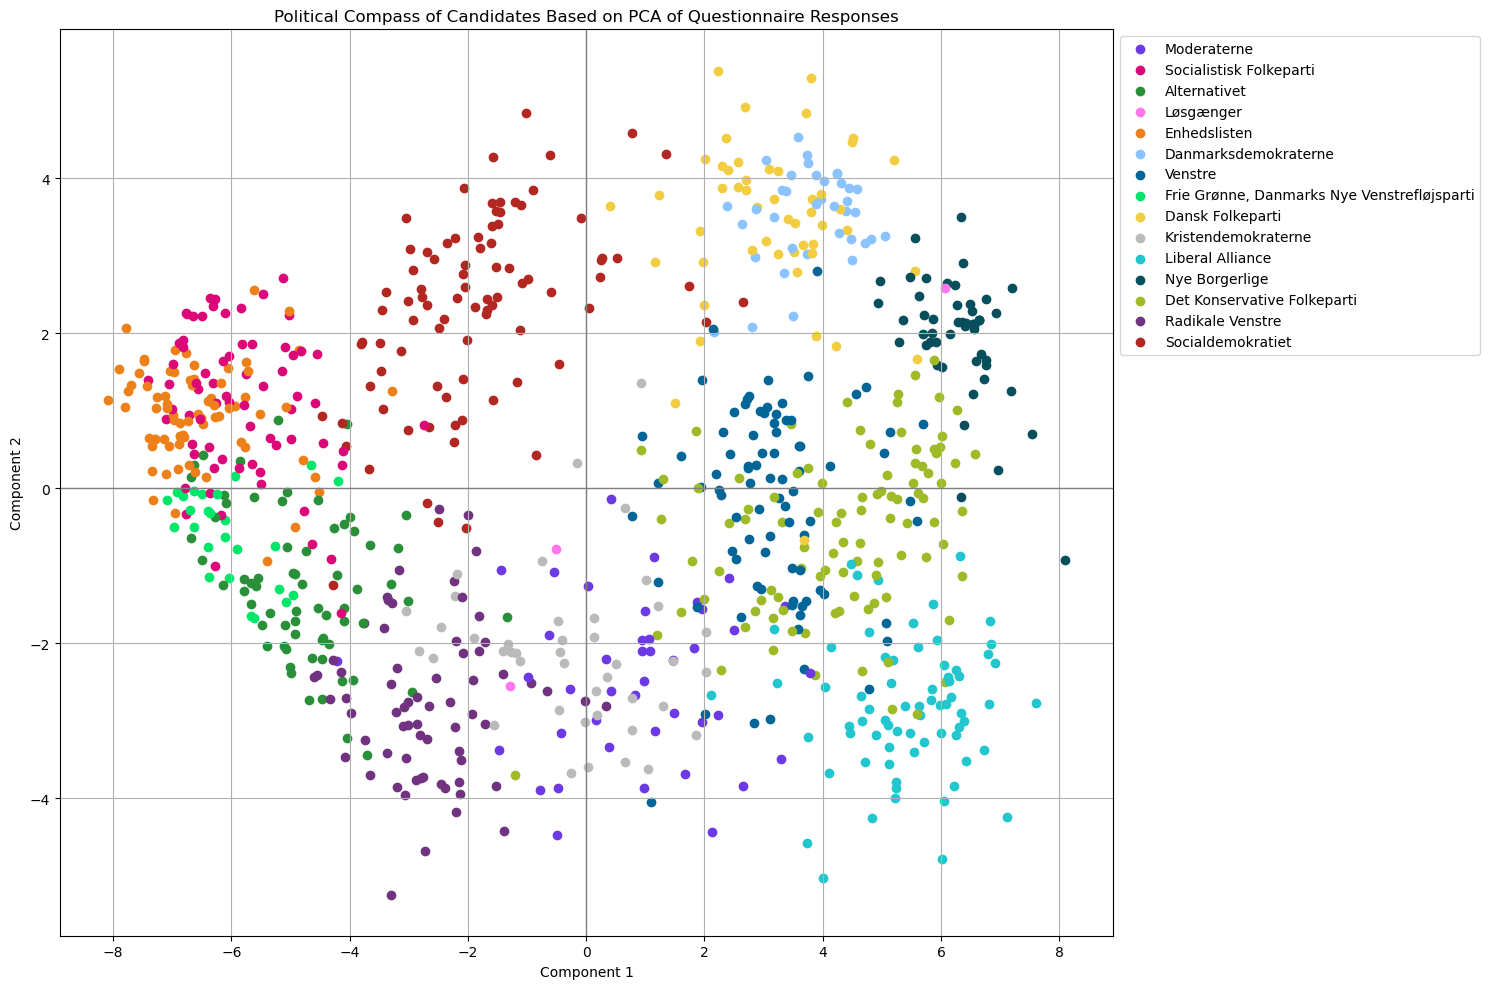

In [45]:
# Define party colors using RGB values
party_colors = {
    'Socialdemokratiet': 'rgb(179, 39, 34)',
    'Venstre': 'rgb(0, 102, 151)',
    'Moderaterne': 'rgb(108, 57, 229)',
    'Socialistisk Folkeparti': 'rgb(221, 8, 120)',
    'Danmarksdemokraterne': 'rgb(138, 195, 255)',
    'Liberal Alliance': 'rgb(33, 198, 207)',
    'Det Konservative Folkeparti': 'rgb(158, 186, 39)',
    'Enhedslisten': 'rgb(237, 128, 25)',
    'Radikale Venstre': 'rgb(113, 50, 128)',
    'Nye Borgerlige': 'rgb(5, 79, 92)',
    'Alternativet': 'rgb(42, 143, 57)',
    'Dansk Folkeparti': 'rgb(243, 205, 65)',
    'Frie Grønne, Danmarks Nye Venstrefløjsparti': 'rgb(0, 230, 106)',
    'Kristendemokraterne': 'rgb(186, 186, 186)',
    'Løsgænger': 'rgb(255, 118, 237)'
}

# Plot the candidates on the political compass
plt.figure(figsize=(15, 10))

# Plot each candidate, coloring by party
for i, (x, y) in enumerate(principal_components):
    party = parti_col[i]
    rgb = party_colors[party][4:-1].split(',')
    color_tuple = (int(rgb[0])/255, int(rgb[1])/255, int(rgb[2])/255)
    plt.scatter(x, y, color=color_tuple, label=party)

# Create the legend without duplicates, and move it outside the plot area
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1))

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Political Compass of Candidates Based on PCA of Questionnaire Responses')

plt.tight_layout()  # Adjust subplot params so that the subplot(s) fits in to the figure area.
plt.show()

The code below creates the same plot, but using plotly.express to make the plot interactive. Hovering above each dot shows the candidate's name, age and their constituency (storkreds). This allows for a better analysis of the 'political outliers' within the respective parties and the overall distribution of the parties across the spectrum. 
For example: 
- Rasmus Paludan, well known for his far-right views (such as Islam should be banned and all non-Western citizens deported) is not belonging to any party, but is placed very clearly among candidates with similar political views - far right Nye Borgerlige.
- Mads Silberg of Det Konservative Folkeparti seems to have different view than the rest of the members of his party - he is the only one on the left side of the compass, every other member is more right-leaning.
- Lars Prier of Dansk Folkeparti has the most liberal views compared to others in their party, he's the only one below the Component 2 axis.
- Looking at the consistency of opinions across the parties, there seems to be agreement on the far-left side of the spectrum among Enhedslisten, Socialistisk Folkeparti and Frie Grønne. Similarly on the other side of the spectrum, there is a considerable overlap between Danmarksdemokraterne and Dansk Folkeparti.
- Some parties are very consistent in their opinions among party members - Nye Borgerlige show very little variance. On the other hand, Moderaterne - true to their name are spread widely across the center of the spectrum.

In [46]:

# Convert the PCA components to a DataFrame for use with Plotly
principal_df = pd.DataFrame(principal_components, columns=['Component 1', 'Component 2'])

data = pd.read_excel('alldata.xlsx')

# Add candidate names and parties to this DataFrame
principal_df['Candidate'] = navn_col  
principal_df['Party'] = parti_col  
principal_df['Age'] = data['alder']
principal_df['Constituency'] = data['storkreds']

# Use Plotly Express to create the scatter plot
fig = px.scatter(principal_df, x='Component 1', y='Component 2', color='Party',
                 hover_data=['Candidate', 'Party', 'Age', 'Constituency'],  # configure hover information
                 title='Political Compass of Candidates',
                 color_discrete_map=party_colors)  # map party colors to the ones defined earlier

# Improve layout
fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')),  # Customize point appearance
                  textposition='top center')
fig.update_layout(showlegend=True,  # Show legend
                  legend_title_text='Party',  # Legend title
                  hovermode='closest',  # Hover only over the closest point
                height=800, width=1200)  # Adjust the size of the plot

# Show figure
fig.show()


The HTML table below again maps the parties to their respective colors. It is shown here because it contains the 'Political position' column. It can be used to confirm the results of the PCA analysis. For example, Enhedslisten is listed as Far-left and that is exactly what the plot shows.

In [47]:
from IPython.display import display, HTML

# Define the table
table = """
<table>
<tr><th>Party letter</th><th>Party name</th><th>Party name (English)</th><th>Political position</th><th>Color</th></tr>
<tr><td>A</td><td>Socialdemokratiet</td><td>Social Democrats</td><td>Centre-left</td><td style="background-color:rgb(179, 39, 34)"></td></tr>
<tr><td>V</td><td>Venstre</td><td>Danish Liberal Party</td><td>Centre-right</td><td style="background-color:rgb(0, 102, 151)"></td></tr>
<tr><td>M</td><td>Moderaterne</td><td>Moderates</td><td>Centre-right</td><td style="background-color:rgb(108, 57, 229)"></td></tr>
<tr><td>F</td><td>Socialistisk Folkeparti</td><td>Socialist People's Party</td><td>Left-wing</td><td style="background-color:rgb(221, 8, 120)"></td></tr>
<tr><td>D</td><td>Danmarksdemokraterne</td><td>Denmark Democrats</td><td>Right-wing</td><td style="background-color:rgb(138, 195, 255)"></td></tr>
<tr><td>I</td><td>Liberal Alliance</td><td>Liberal Alliance</td><td>Right-wing</td><td style="background-color:rgb(33, 198, 207)"></td></tr>
<tr><td>C</td><td>Det Konservative Folkeparti</td><td>Conservative People's Party</td><td>Right-wing</td><td style="background-color:rgb(158, 186, 39)"></td></tr>
<tr><td>Æ</td><td>Enhedslisten</td><td>Red-Green Alliance</td><td>Far-left</td><td style="background-color:rgb(237, 128, 25)"></td></tr>
<tr><td>B</td><td>Radikale Venstre</td><td>Social Liberal Party</td><td>Centre-left</td><td style="background-color:rgb(113, 50, 128)"></td></tr>
<tr><td>D</td><td>Nye Borgerlige</td><td>New Right</td><td>Far-right</td><td style="background-color:rgb(5, 79, 92)"></td></tr>
<tr><td>Z</td><td>Alternativet</td><td>The Alternative</td><td>Centre-left</td><td style="background-color:rgb(42, 143, 57)"></td></tr>
<tr><td>O</td><td>Dansk Folkeparti</td><td>Danish People's Party</td><td>Far-right</td><td style="background-color:rgb(243, 205, 65)"></td></tr>
<tr><td>G</td><td>Frie Grønne, Danmarks Nye Venstrefløjsparti</td><td>Free Greens</td><td>Centre-left</td><td style="background-color:rgb(0, 230, 106)"></td></tr>
<tr><td>K</td><td>Kristendemokraterne</td><td>Christian Democrats</td><td>Centre-right</td><td style="background-color:rgb(186, 186, 186)"></td></tr>
<tr><td>L</td><td>Løsgænger</td><td>No party</td><td>---</td><td style="background-color:rgb(255, 118, 237)"></td></tr>      
</table>
"""

# Display the table
display(HTML(table))

Party letter,Party name,Party name (English),Political position,Color
A,Socialdemokratiet,Social Democrats,Centre-left,
V,Venstre,Danish Liberal Party,Centre-right,
M,Moderaterne,Moderates,Centre-right,
F,Socialistisk Folkeparti,Socialist People's Party,Left-wing,
D,Danmarksdemokraterne,Denmark Democrats,Right-wing,
I,Liberal Alliance,Liberal Alliance,Right-wing,
C,Det Konservative Folkeparti,Conservative People's Party,Right-wing,
Æ,Enhedslisten,Red-Green Alliance,Far-left,
B,Radikale Venstre,Social Liberal Party,Centre-left,
D,Nye Borgerlige,New Right,Far-right,


In the next step, t-SNE is used to plot the data. As expected from t-SNE, the shape of the data is preserved to a much higher degree, which shows less overlap between parties and allows for easier analysis. The candidates of each party are closer together and more details are revealed. Especially the points of interest mentioned before - overlap in far-left and far-right is not so apparent now.

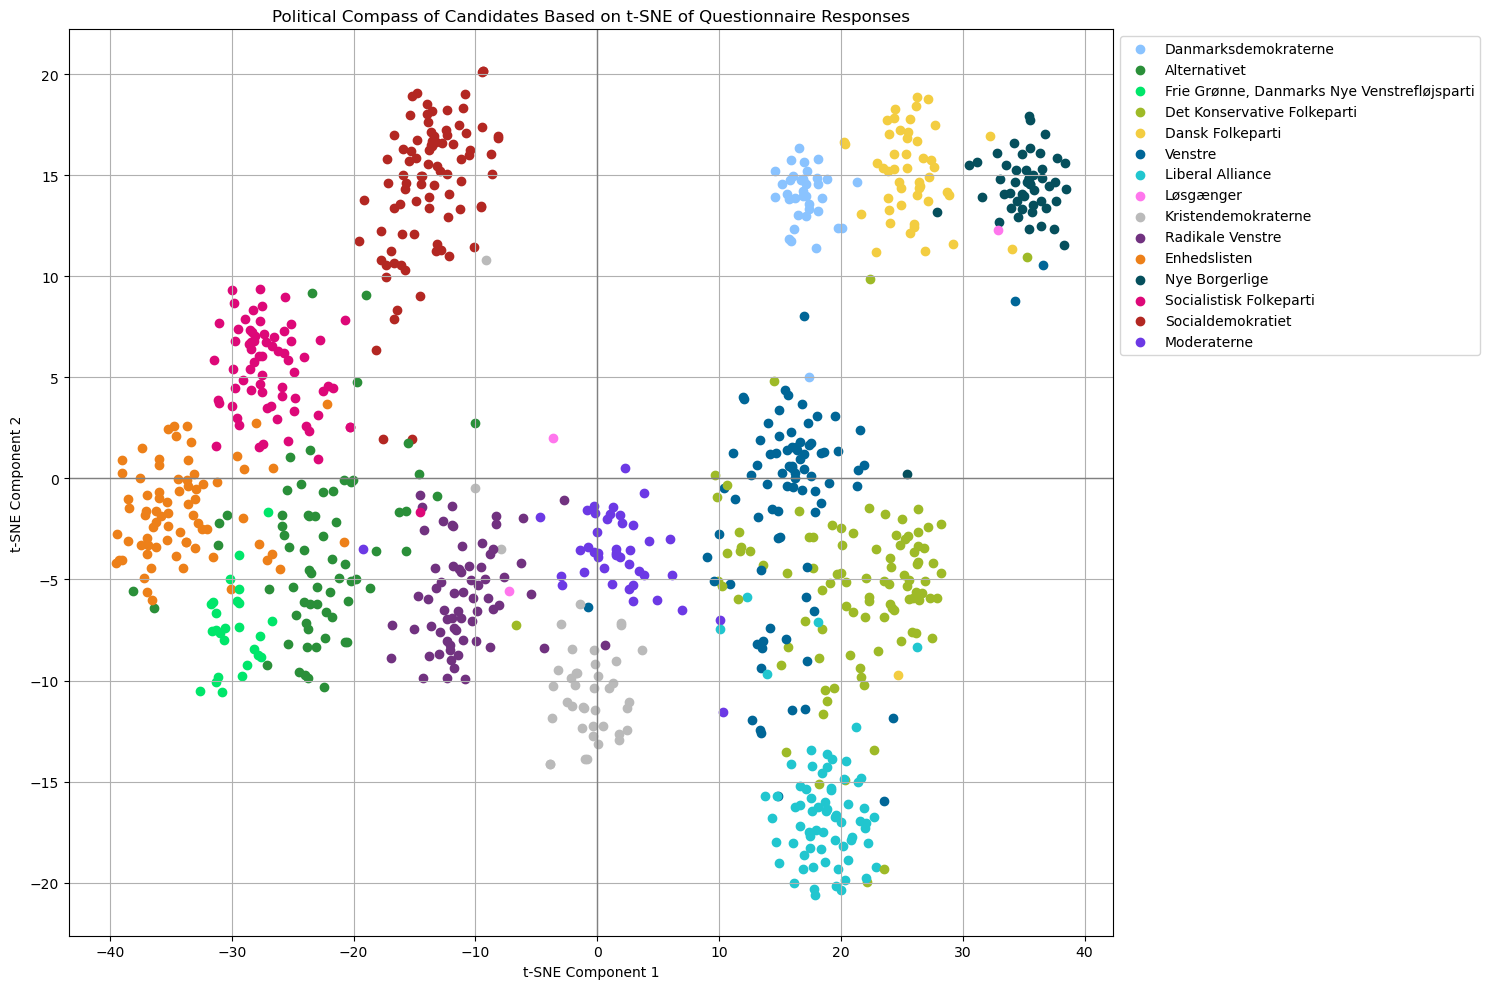

In [48]:

parties = parti_col
names = navn_col

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)  
tsne_results = tsne.fit_transform(data_scaled)

# Plot the candidates using t-SNE results
plt.figure(figsize=(15, 10))

# Create a dictionary to map each party to a matplotlib color
for i, (x, y) in enumerate(tsne_results):
    party = parties[i]
    rgb = party_colors[party][4:-1].split(',')
    color_tuple = (int(rgb[0])/255, int(rgb[1])/255, int(rgb[2])/255)
    plt.scatter(x, y, color=color_tuple, label=party)

# Create the legend without duplicates, and move it outside the plot area
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))  # Remove duplicates in label list
unique_handles = [handles[labels.index(label)] for label in unique_labels]  # Get the handles for unique labels
plt.legend(unique_handles, unique_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid(True)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Political Compass of Candidates Based on t-SNE of Questionnaire Responses')

plt.tight_layout()  # Adjust subplot params so that the subplot(s) fits in to the figure area.
plt.show()